##   SweetStats- Unveiling the Diabetic (TASK-DS)

INTRODUCTION:
->Choose the relative "DIABETIC DATASET" from any resource

DESCRIPTION:
You will work with a diabetic dataset to develop a predictive model that can determine the likelihood of a patient developing diabetes.
Diabetes is a chronic medical condition that affects millions of people worldwide, and early prediction can play a crucial role in its management and prevention.

DATASET:
The dataset contains various medical measurements for patients, including attributes like glucose level, blood pressure, BMI, age, and more. 
Each record also includes a binary indicator of diabetes status (1 for diabetes, 0 for non-diabetes).  




### Importing needed Libraries

In [262]:
import pandas as pd # NumPy for numerical computations (arrays, matrices)
import numpy as np # pandas for data manipulation (DataFrames)
import matplotlib.pyplot as plt# matplotlib for visualizations (plots)
import seaborn as sns# seaborn for enhanced visualizations

from sklearn.model_selection import train_test_split  # Split data into training and testing sets for model evaluation

from sklearn.linear_model import LogisticRegression # Logistic Regression for classification tasks
from sklearn.svm import SVC # Support Vector Machine for classification
from sklearn.ensemble import RandomForestClassifier # Random Forest for robust classification
from sklearn.ensemble import GradientBoostingClassifier# Gradient Boosting for decision tree-based learning with improved accuracy

from sklearn.metrics import confusion_matrix # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score , recall_score , f1_score # Calculate common performance metrics
from sklearn.metrics import classification_report #a comprehensive summary of the precision, recall, F1-score

import warnings
warnings.filterwarnings('ignore')

from tabulate import tabulate #to format data in tabular form

### 1.Data Collection

In [247]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=column_names)

## 2.EDA(Exploratory Data Analysis)

In [263]:
data.head() # Display the first 5 rows of the dataset to understand its structure and content

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [264]:
data.shape # Get the dimensions of the dataset (number of rows and columns)

(768, 9)

In [265]:
data.info() # Display a concise summary of the dataset including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [266]:
data.describe() # Generate descriptive statistics of the dataset, including mean, std, min, and max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [267]:
data["Outcome"].value_counts() # Count the occurrences of each unique value in column

Outcome
0    500
1    268
Name: count, dtype: int64

###### 1 for diabetes, 0 for non-diabetes

In [268]:
data.duplicated().sum() # Count the number of duplicate rows in the dataset

0

In [269]:
data.corr()  # Calculate the correlation matrix to understand relationships between features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


#### Correlation Matrix

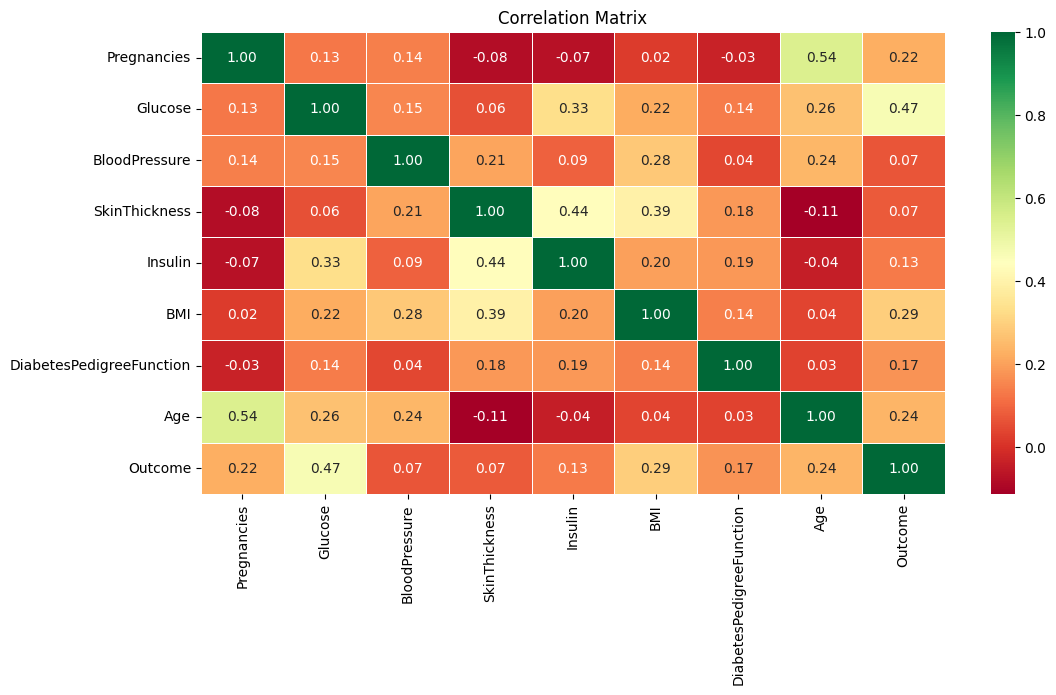

In [140]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

######  From the correlation matrix heatmap, it is observed that attributes such as glucose level, age, BMI, insulin, and skin thickness exhibit a stronger correlation with the outcome variable, indicating their potential significance in predicting diabetes.

#### Pair Plot of Selected Features

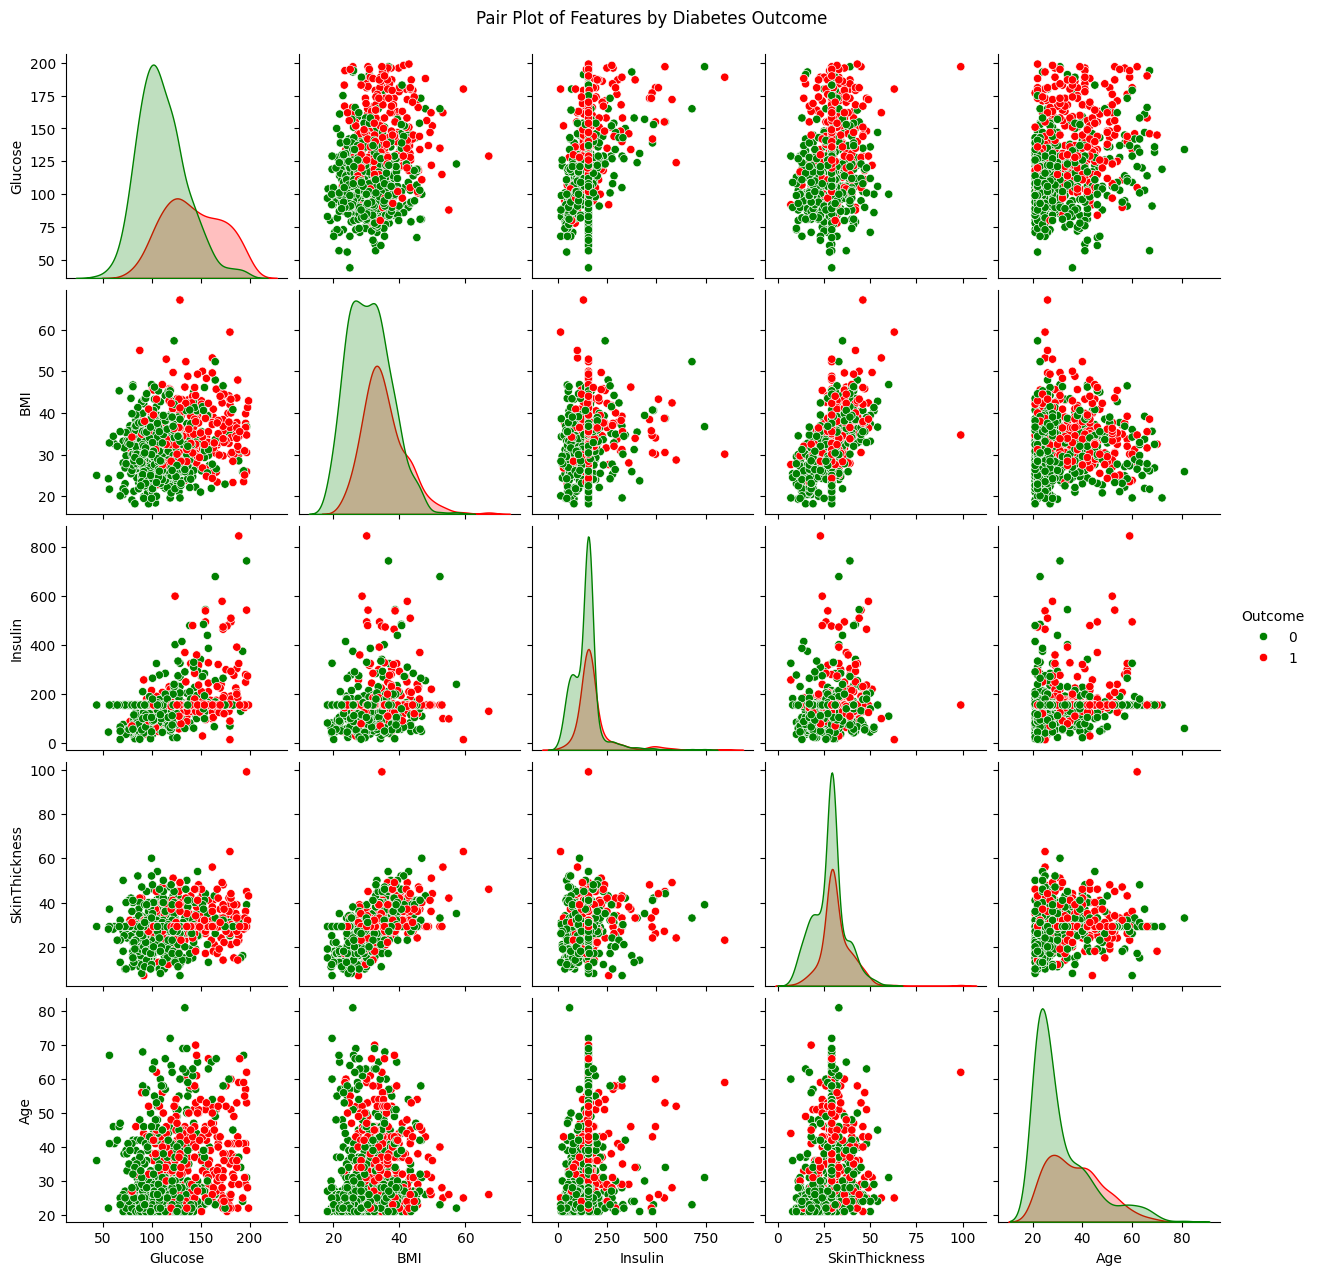

In [270]:
# Pair plot for Glucose with other features
pair_plot = sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BMI', 'Insulin', 'SkinThickness', 'Age'], palette=['g', 'r'])
pair_plot.fig.suptitle('Pair Plot of Features by Diabetes Outcome', y=1.02)  # Adjust the title position
plt.show()

#### Distribution of Features by Outcome

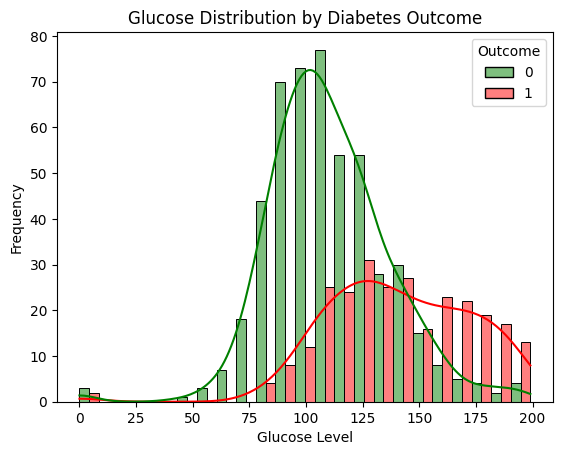

In [250]:
# Glucose distribution by Outcome
sns.histplot(data=data, x='Glucose', hue='Outcome', multiple='dodge', kde=True, palette=['g', 'r'])
plt.title('Glucose Distribution by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

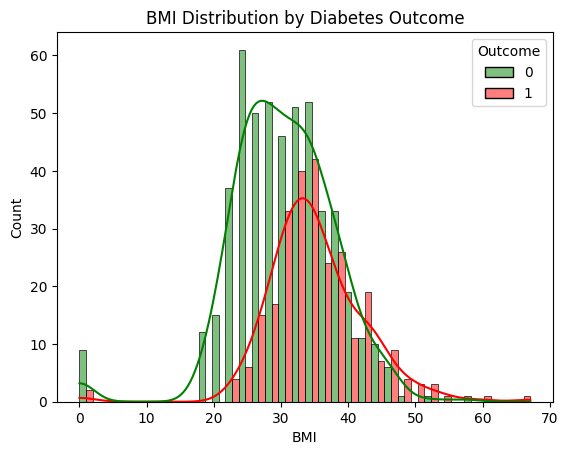

In [251]:
# BMI distribution by Outcome
sns.histplot(data=data, x='BMI', hue='Outcome', multiple='dodge', kde=True, palette=['g', 'r'])
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

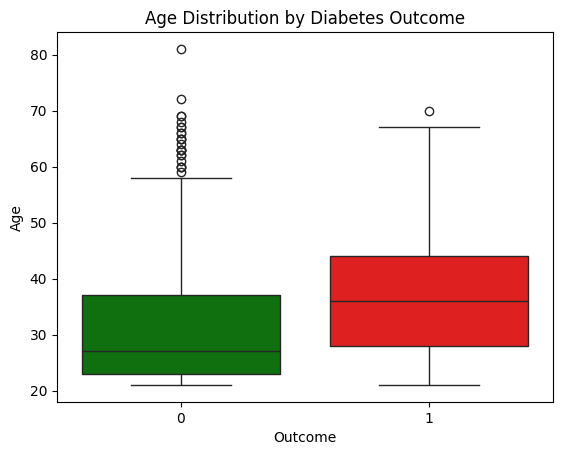

In [252]:
# Age distribution by Outcome
sns.boxplot(x='Outcome', y='Age', data=data,palette=['g', 'r'])
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

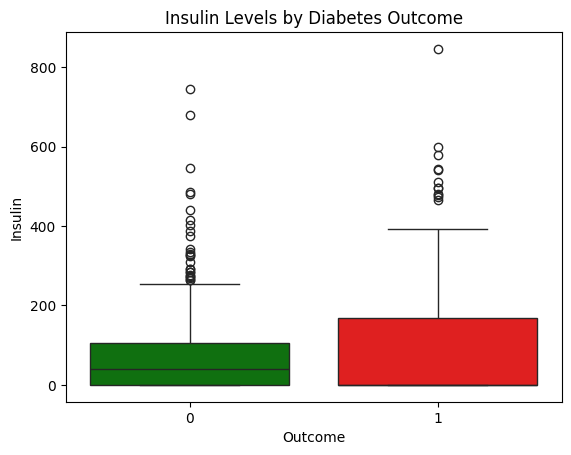

In [253]:
# Insulin levels by Outcome
sns.boxplot(x='Outcome', y='Insulin', data=data,palette=['g', 'r'])
plt.title('Insulin Levels by Diabetes Outcome')
plt.show()

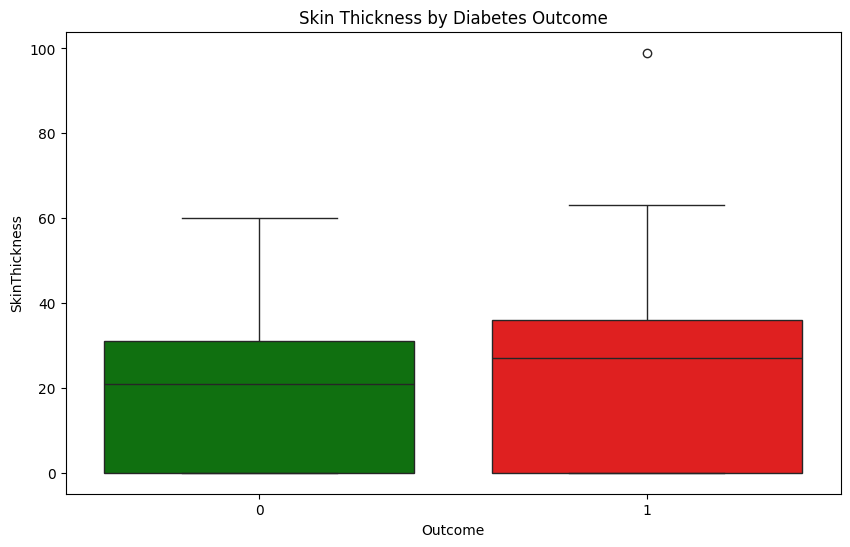

In [254]:
# Skin Thickness by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='SkinThickness', data=data, palette=['g', 'r'])
plt.title('Skin Thickness by Diabetes Outcome')
plt.show()

####  Data Distribution

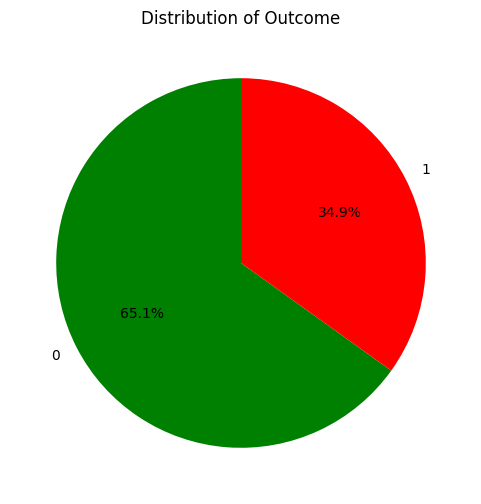

In [167]:
outcome_counts = data['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors = ['g', 'r']  )
plt.title('Distribution of Outcome')
plt.show()

## 3.Preprocessing the Data


In [256]:
# Replace zero values with NaN 
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 
                                                                              'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with mean of  column
data.fillna(data.mean(), inplace=True)

In [220]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### 4.Feature Selection and Model Building


##### Model Training and Evaluation
##### Logistic Regression, Support Vector Machine, Random Forest, and Gradient Boosting

In [257]:
# Split data
x = data.drop('Outcome', axis=1)  # Features for model training
y = data['Outcome']              # Target variable for prediction

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Logistic Regression:
Accuracy = 0.7597402597402597, Recall = 0.6181818181818182, F1 Score = 0.6476190476190476


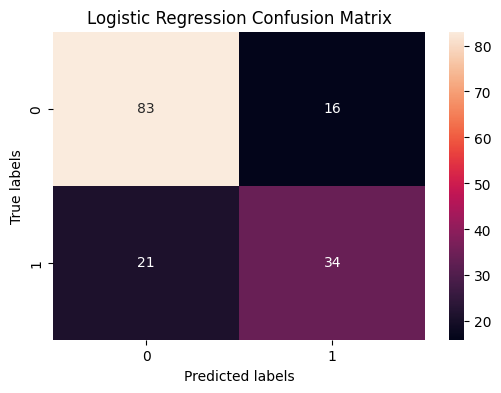

Support Vector Machine:
Accuracy = 0.7597402597402597, Recall = 0.5454545454545454, F1 Score = 0.6185567010309279


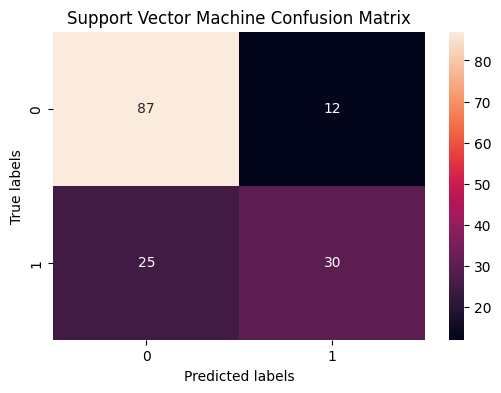

Random Forest Classifier:
Accuracy = 0.7597402597402597, Recall = 0.6727272727272727, F1 Score = 0.6666666666666666


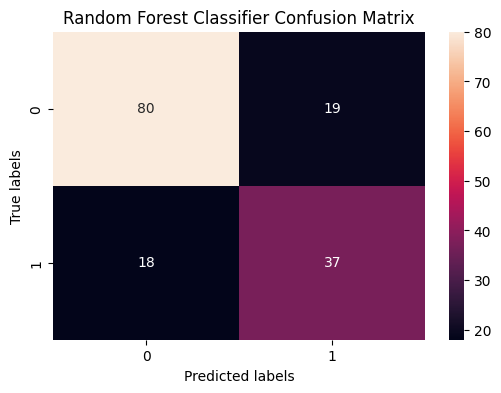

Gradient Boosting Classifier:
Accuracy = 0.7272727272727273, Recall = 0.7090909090909091, F1 Score = 0.65


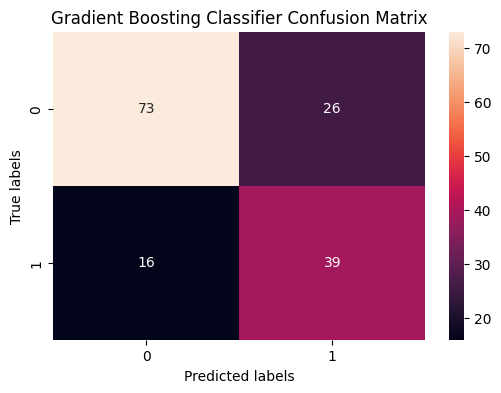

In [258]:
# Initialize lists to store model performance metrics
names = []
accuracies = []
recalls = []
f1_scores = []

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, class_weight="balanced"),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    names.append(name)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1_scores.append(f1)
    
    print(f"{name}:")
    print(f"Accuracy = {accuracy}, Recall = {recall}, F1 Score = {f1}")
    
    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

 #### Model Performance Summary

In [231]:
final_result = pd.DataFrame({
    "Algorithm": names,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1 Score": f1_scores
})

# Display the DataFrame using tabulate
print(tabulate(final_result, headers='keys', tablefmt='psql'))

+----+------------------------------+------------+----------+------------+
|    | Algorithm                    |   Accuracy |   Recall |   F1 Score |
|----+------------------------------+------------+----------+------------|
|  0 | Logistic Regression          |   0.75974  | 0.618182 |   0.647619 |
|  1 | Support Vector Machine       |   0.75974  | 0.545455 |   0.618557 |
|  2 | Random Forest Classifier     |   0.766234 | 0.690909 |   0.678571 |
|  3 | Gradient Boosting Classifier |   0.733766 | 0.709091 |   0.655462 |
+----+------------------------------+------------+----------+------------+


### visualization

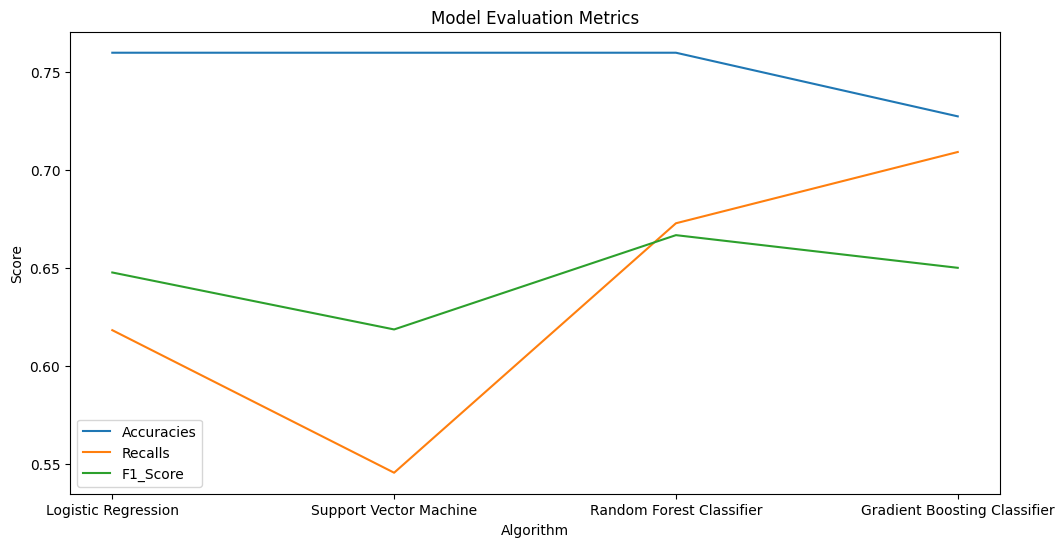

In [271]:
# Set the matplotlib figure

plt.figure(figsize=(12, 6))

plt.plot(final_result.Algorithm,accuracies,label='Accuracies')
plt.plot(final_result.Algorithm,recalls,label='Recalls')
plt.plot(final_result.Algorithm,f1_scores,label='F1_Score')


plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.legend()

plt.show()

### Summary and Conclusion
- **Logistic Regression** achieved an accuracy of  0.75974 %, recall of  0.618182 %, and F1 score of 0.647619 %.

- **Support Vector Machine** performed with an accuracy of  0.75974 %, recall of  0.545455%, and F1 score of 0.618557 %.

- **Random Forest Classifier** showed an accuracy of 0.766234 %, recall of  0.690909 %, and F1 score of 0.678571 %.

- **Gradient Boosting Classifier** resulted in an accuracy of 0.733766 %, recall of 0.709091 %, and F1 score of 0.655462 %.

- The confusion matrix and classification reports provide detailed insights into each models performance.

- Future work could include hyperparameter tuning and exploring other machine learning algorithms for improved performance.

### References
- Pima Indians Diabetes Dataset: [Link](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
